<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Load the dataset into a dataframe.


In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


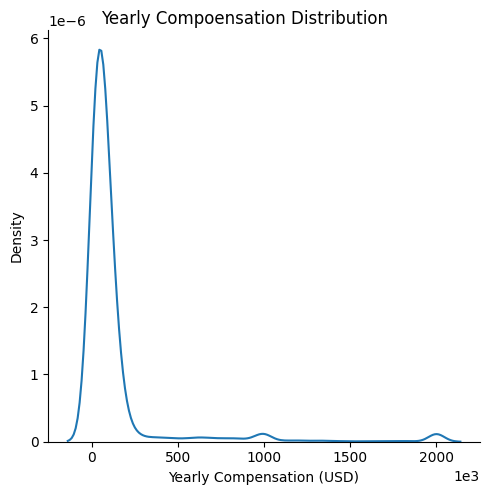

In [12]:
ax = sns.displot(df, x="ConvertedComp", kind="kde")
ax.figure.suptitle("Yearly Compoensation Distribution")
plt.ticklabel_format(style="sci", axis="x", scilimits=(3, 3))
ax.set_axis_labels(x_var="Yearly Compensation (USD)")

Plot the histogram for the column `ConvertedComp`.


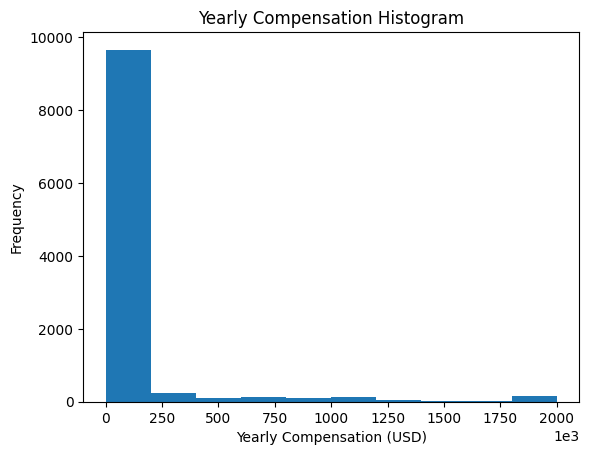

In [13]:
ax = df["ConvertedComp"].plot(
    kind="hist", xlabel="Yearly Compensation (USD)", title="Yearly Compensation Histogram"
)
# Make the x-axis 1e3 so the numbers are in thousands of dollars 
plt.ticklabel_format(style="sci", axis="x", scilimits=(3, 3))

What is the median of the column `ConvertedComp`?


In [14]:
df["ConvertedComp"].median()

57745.0

How many responders identified themselves only as a **Man**?


In [15]:
df.Gender.value_counts().loc["Man"]

10480

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [16]:
df[df["Gender"]=="Woman"]["ConvertedComp"].median()

57708.0

Give the five number summary for the column `Age`?


**Double click here for info on five number summary**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [19]:
df.Age.describe()

count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64

Plot a histogram of the column `Age`.


<Axes: title={'center': 'Age Histogram'}, xlabel='Respondent Age', ylabel='Frequency'>

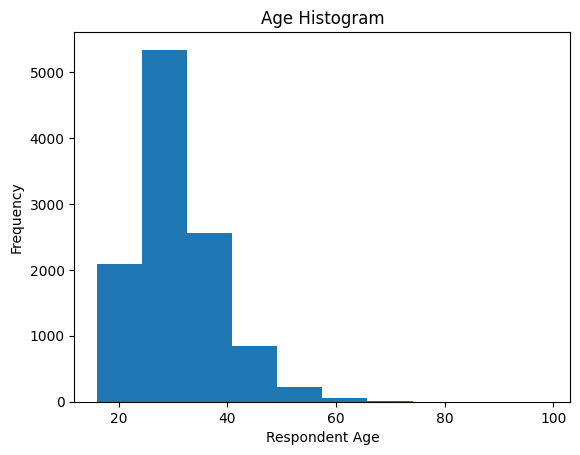

In [20]:
df["Age"].plot(kind="hist", title="Age Histogram", xlabel="Respondent Age")

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot.


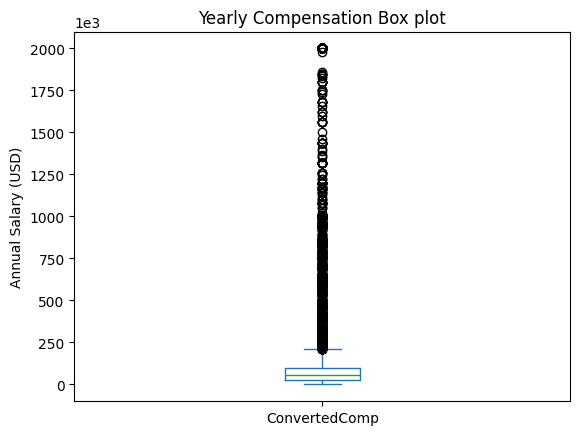

In [21]:
df["ConvertedComp"].plot(
    kind="box", title="Yearly Compensation Box plot", ylabel="Annual Salary (USD)"
)
plt.ticklabel_format(style="sci", axis="y", scilimits=(3, 3))

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [26]:
iqr = df["ConvertedComp"].describe().loc["75%"] - df["ConvertedComp"].describe().loc["25%"] #73132.0
# different ways to get iqr
# q1_a = np.nanpercentile(df["ConvertedComp"], 25)
# q1_a = df['ConvertedComp'].quantile(0.25)
# q3_a = np.nanpercentile(df["ConvertedComp"], 75)
# q3_a = df['ConvertedComp'].quantile(0.75)
# q3_a - q1_a
print(iqr)

73132.0


Find out the upper and lower bounds.


In [28]:
upper = df["ConvertedComp"].describe().loc["75%"] + (1.5*iqr)  # 209698.0
lower = df["ConvertedComp"].describe().loc["25%"] - (1.5*iqr) # -82830.0
print("Upper whisker:", upper, "\nLower whisker:", lower)

Upper whisker: 209698.0 
Lower whisker: -82830.0


Identify how many outliers are there in the `ConvertedComp` column.


In [30]:
len(df[(df["ConvertedComp"] > upper) | (df["ConvertedComp"] < lower)])

879

Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [36]:
# get the values less than upper limit and more than lower limit but keep the null values 
new_df = df[((df["ConvertedComp"] <= upper) & (df["ConvertedComp"] >= lower)) | (df["ConvertedComp"].isna())]
new_df["ConvertedComp"].describe()

count      9703.000000
mean      59883.208389
std       43394.336755
min           0.000000
25%       24060.000000
50%       52704.000000
75%       85574.500000
max      209356.000000
Name: ConvertedComp, dtype: float64

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [34]:
df.corr(numeric_only=True).loc["Age"]

Respondent       0.004041
CompTotal        0.006970
ConvertedComp    0.105386
WorkWeekHrs      0.036518
CodeRevHrs      -0.020469
Age              1.000000
Name: Age, dtype: float64

Text(0.5, 1.0, 'Correlation Matrix of Age')

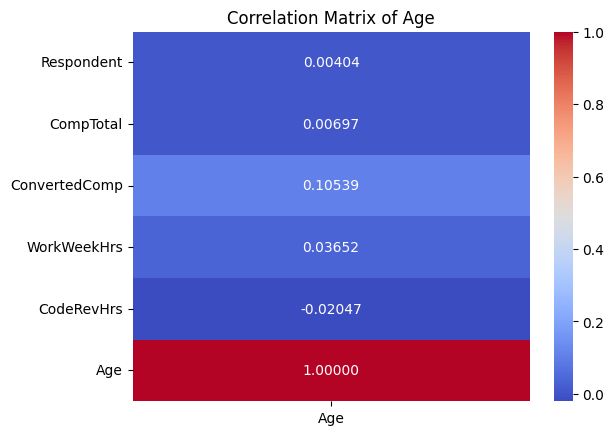

In [41]:
sns.heatmap(
    df.corr(numeric_only=True).loc["Age"].to_frame(),
    cmap="coolwarm",
    annot=True,
    fmt=".5f",
).set_title("Correlation Matrix of Age")

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
